This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm
Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

dateload    The timestamp when the survey was started.

screenw     The width the of user's screen in pixels

screenh     The height of the user's screen in pixels

introelapse The time in seconds spent on the landing / intro page

testelapse  The time in seconds spent on the page with the survey questions

endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions
country     The country, determined by technical information (NOT ASKED AS A QUESTION)

lat_appx_lots_of_err   approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information

long_appx_lots_of_err   approximate longitude of user

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw = pd.read_csv('data-final.csv', sep='\t')
raw.head()
raw.shape

(25558, 110)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(15), int64(91), object(4)
memory usage: 21.4+ MB


In [68]:
raw.country.unique()

array(['GB', 'MY', 'KE', 'SE', 'US', 'FI', 'UA', 'PH', 'FR', 'AU', 'IN',
       'CA', 'NL', 'ZA', 'HK', 'BR', 'CH', 'TH', 'IT', 'ES', 'AE', 'HR',
       'GR', 'IE', 'OM', 'DE', 'PT', 'SG', 'NONE', 'RO', 'NO', 'BD', 'BN',
       'NG', 'LT', 'ET', 'ID', 'BE', 'AT', 'DK', 'TZ', 'LU', 'PL', 'JP',
       'MX', 'CY', 'UG', 'LK', 'TR', 'MM', 'CO', 'EE', 'AR', 'IS', 'HU',
       'PR', 'PK', 'TN', 'LV', 'CZ', 'NZ', 'RS', 'IL', 'JM', 'CL', 'QA',
       'SA', 'VN', 'KZ', 'BA', 'MU', 'EG', 'PE', nan, 'SI', 'JO', 'TW',
       'DO', 'DZ', 'KW', 'MA', 'MT', 'TT', 'BS', 'VE', 'RU', 'KR', 'LR',
       'GT', 'BG', 'IM', 'GH', 'SO', 'SK', 'MV', 'CN', 'AZ', 'AL', 'KH',
       'LB', 'UY', 'ZW', 'UZ', 'HN', 'CR', 'GE', 'GI', 'MO', 'NP', 'IR',
       'MK', 'MN', 'ZM', 'NI', 'BH', 'SD', 'BZ', 'GD', 'KY', 'BB', 'CI',
       'PG', 'AG', 'VI', 'PY', 'PA', 'SZ', 'SV', 'ME', 'BM', 'AO', 'KG',
       'FJ', 'VC', 'AF', 'RW', 'GG', 'BY', 'GP', 'AX', 'LY', 'JE', 'MP',
       'SY', 'PS', 'GA'], dtype=object)

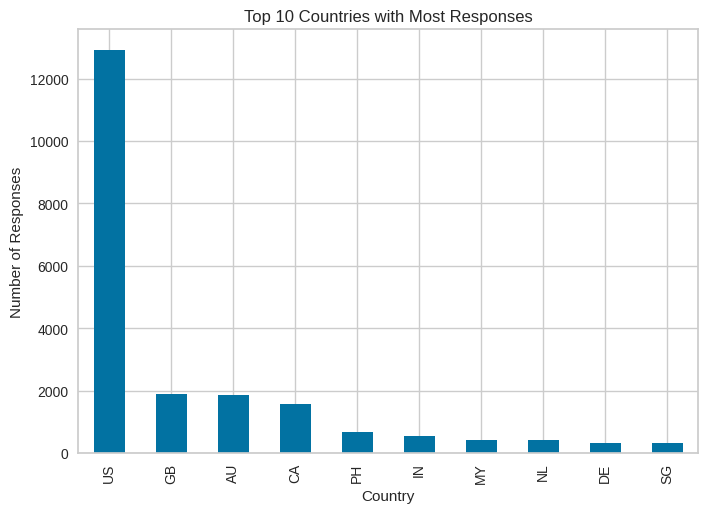

In [69]:
# Get the counts of each unique value in the 'country' column
country_counts = raw['country'].value_counts()

# Select the top 10 countries with the most responses
top_countries = country_counts.nlargest(10)
top_countries.plot(kind='bar')


plt.title('Top 10 Countries with Most Responses')
plt.xlabel('Country')
plt.ylabel('Number of Responses')
plt.show()

In [5]:
raw.size

2811380

In [6]:
raw.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [7]:
#Selecting rows where IP addresses and responses are 1:1
IPC1Personality = raw.loc[raw["IPC"]==1]
IPC1Personality.shape

(17665, 110)

In [8]:
raw.loc[raw["IPC"]==1]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
5,3,3,4,2,4,2,2,3,3,4,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3.0,1.0,SE,59.3333,18.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25552,2,4,2,4,3,3,2,4,2,4,...,2016-03-22 22:50:59,1920.0,1080.0,57.0,296.0,4.0,1.0,AU,-37.8139,144.9634
25553,1,3,4,5,3,1,1,4,2,5,...,2016-03-22 22:53:11,768.0,1024.0,6.0,180.0,11.0,1.0,AU,-27.0,133.0
25554,4,2,5,3,4,2,4,3,4,4,...,2016-03-22 22:55:32,320.0,568.0,23.0,193.0,16.0,1.0,AU,-27.0,133.0
25555,3,3,3,3,4,2,1,3,3,4,...,2016-03-22 23:01:17,320.0,568.0,56.0,343.0,5.0,1.0,US,39.6155,-75.7044


In [9]:
#Selecting response values
values = IPC1Personality.iloc[:,0:50]
# values = values[0:100000]
values.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
5,3,3,4,2,4,2,2,3,3,4,...,5,1,5,1,3,1,5,4,5,2


In [10]:
# print(values.isnull().any().sum())
# values.isnull().sum().sort_values(ascending = False)
values.dropna(inplace=True)
values.size

883250

In [11]:
# Questions asked in the negative (high value responses correspond to low trait score)
values.EXT2 = 6 - values.EXT2.values
values.EXT4 = 6 - values.EXT4.values
values.EXT6 = 6 - values.EXT6.values
values.EXT10 = 6 - values.EXT10.values
values.EXT8 = 6 - values.EXT8.values
values.EXT10 = 6 - values.EXT10.values
values.EST2 = 6 - values.EST2.values
values.EST4 = 6 - values.EST4.values
values.AGR1 = 6 - values.AGR1.values
values.AGR3 = 6 - values.AGR3.values
values.AGR5 = 6 - values.AGR5.values
values.AGR7 = 6 - values.AGR7.values
values.CSN2 = 6 - values.CSN2.values
values.CSN4 = 6 - values.CSN4.values
values.CSN6 = 6 - values.CSN6.values
values.CSN8 = 6 - values.CSN8.values
values.OPN2 = 6 - values.OPN2.values
values.OPN4 = 6 - values.OPN4.values
values.OPN6 = 6 - values.OPN6.values

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

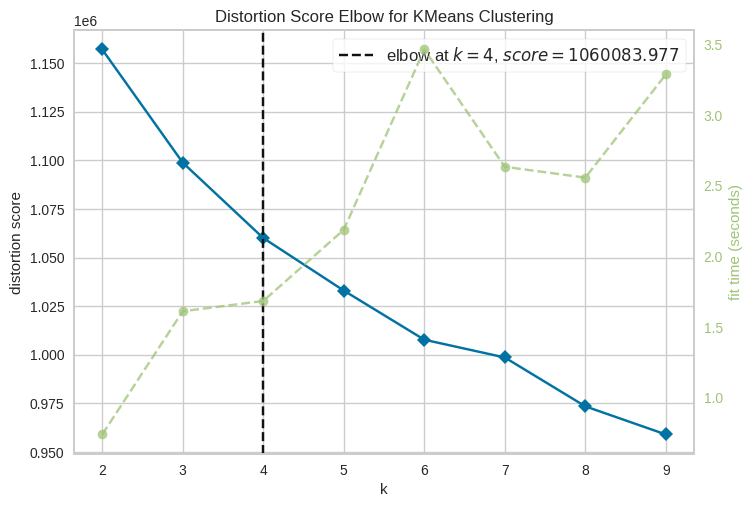

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Upper bound at 10
valuesSample = values.sample(frac=1)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(valuesSample)
visualizer.poof()

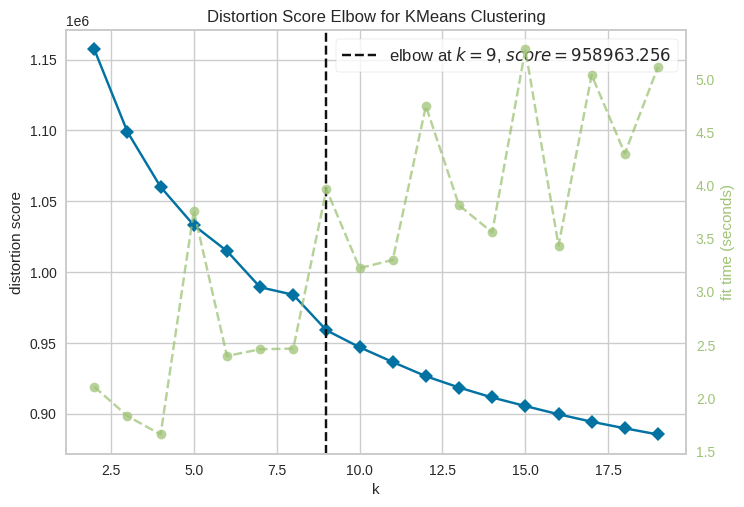

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Upper bound at 20
valuesSample = values.sample(frac=1)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(valuesSample)
visualizer.poof()

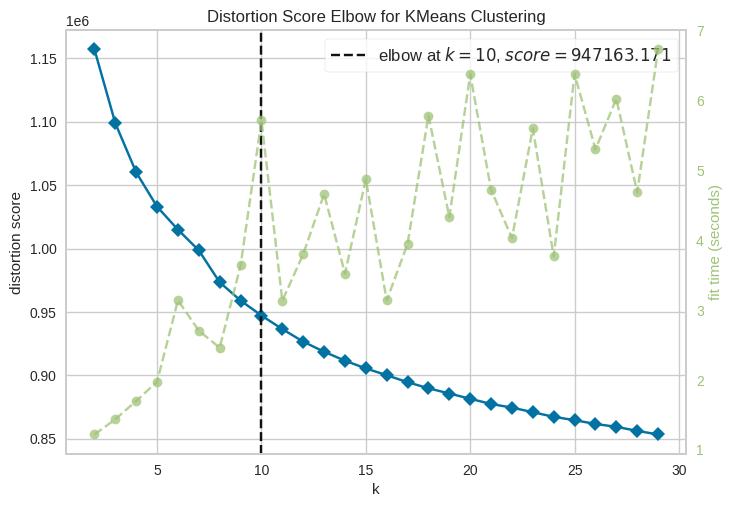

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Upper bound at 30
valuesSample = values.sample(frac=1)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(valuesSample)
visualizer.poof()

In [53]:
rawProfiles = k_fit.cluster_centers_

In [54]:
values.size

883250

In [55]:
# Sums all 10 values for each trait for every participant leaving the 5 categories with total score
cleanData = {'O':np.sum(values.iloc[:,40:50],axis=1)/10,
             'C':np.sum(values.iloc[:,30:40],axis=1)/10,
             'E':np.sum(values.iloc[:,0:10],axis=1)/10,
             'A':np.sum(values.iloc[:,20:30],axis=1)/10,
             'N':np.sum(values.iloc[:,10:20],axis=1)/10}
cleanData = pd.DataFrame(data = cleanData)

cleanData.head()
# histo = plot.subplots(5)
# histo[4] = cleanData['O'].plot.hist()
# histo[3] = cleanData['C'].plot.hist()
# histo[2] = cleanData['E'].plot.hist()
# histo[1] = cleanData['A'].plot.hist()
# histo[0] = cleanData['N'].plot.hist()


,O,C,E,A,N
0,4.5,3.2,4.2,3.9,2.4
1,3.5,3.7,2.4,4.4,2.5
2,4.1,3.4,2.9,4.2,2.6
3,3.9,2.5,2.8,3.8,2.9
5,4.4,3.7,3.4,3.8,2.2


In [56]:
cleanData.size

88325

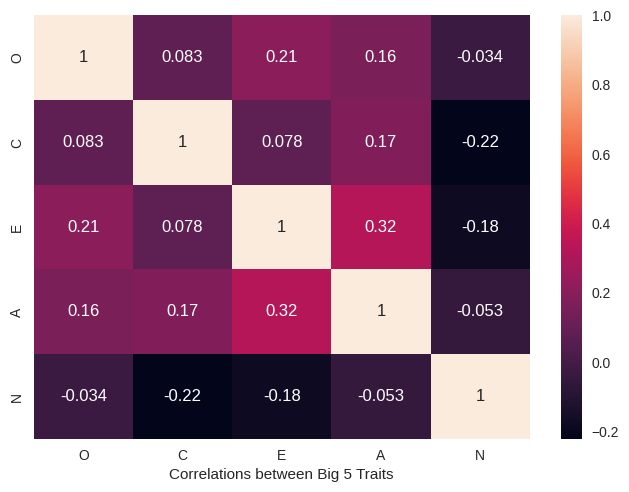

In [71]:
# Correlations between traits
correlationMatrix = cleanData.corr()
sns.heatmap(correlationMatrix, annot=True)

plt.xlabel("Correlations between Big 5 Traits")
plt.show()
# No notable correlations except a weak one between Agreeableness and Extraversion

In [20]:
average = np.array([cleanData['O'].mean(), cleanData['C'].mean(), cleanData['E'].mean(), cleanData['A'].mean(), cleanData['N'].mean()])
average

array([3.83609963, 3.286227  , 3.04489669, 3.73204076, 3.0923974 ])

In [58]:
# 9 clusters the expected best based on elbows
# 16 clusters to see if Myers-Briggs has any relation to Big 5
# 6 clusters for reference
k_6 = KMeans(n_clusters=6)
k_9 = KMeans(n_clusters=9)
k_16 = KMeans(n_clusters=16)
k_6_fit = k_6.fit(cleanData)
k_9_fit = k_9.fit(cleanData)
k_16_fit = k_16.fit(cleanData)

In [59]:
profiles = k_9_fit.cluster_centers_
profiles

array([[4.07734153, 2.56816462, 3.47209082, 3.96229896, 3.87724693],
       [3.91679598, 3.50009128, 2.41250571, 3.98206298, 3.8433592 ],
       [3.75743842, 3.87137931, 2.65743842, 3.93152709, 2.4137931 ],
       [3.55802685, 2.60192644, 2.22977233, 3.01185055, 3.94851138],
       [2.92451382, 3.05056295, 2.75808598, 3.3383828 , 2.88909928],
       [4.20920354, 4.05079646, 3.76961652, 4.35368732, 2.01976401],
       [4.01640809, 2.71292901, 3.53366244, 3.89891866, 2.42769158],
       [4.15026882, 3.44879032, 2.6672043 , 2.51337366, 2.75860215],
       [3.94109647, 3.78593285, 3.69077773, 4.14347641, 3.40365491]])

In [60]:
cleanData.size

88325

In [62]:
from sklearn import metrics

X = cleanData
labels = k_6_fit.labels_

# Silhouette Score
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {silhouette_score}')

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
print(f'Davies Bouldin Score: {davies_bouldin_score}')

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(X, labels)
print(f'Calinski Harabasz Score: {calinski_harabasz_score}')

Silhouette Score: 0.1569663322912223
Davies Bouldin Score: 1.5925455960977744
Calinski Harabasz Score: 3073.298639628988


In [63]:
from sklearn import metrics

X = cleanData
labels = k_9_fit.labels_

# Silhouette Score
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {silhouette_score}')

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
print(f'Davies Bouldin Score: {davies_bouldin_score}')

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(X, labels)
print(f'Calinski Harabasz Score: {calinski_harabasz_score}')

Silhouette Score: 0.14367719302334955
Davies Bouldin Score: 1.5117700135346572
Calinski Harabasz Score: 2583.6512484096293


In [64]:
from sklearn import metrics

X = cleanData
labels = k_16_fit.labels_

# Silhouette Score
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {silhouette_score}')

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
print(f'Davies Bouldin Score: {davies_bouldin_score}')

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(X, labels)
print(f'Calinski Harabasz Score: {calinski_harabasz_score}')

Silhouette Score: 0.13982636224695286
Davies Bouldin Score: 1.4268690483676822
Calinski Harabasz Score: 1995.5537272671886


**Conclusion:**

With the Silhouette Score and the Davies Bouldin Score contradicting each other, there is no clear indication of personality 'types' of the kind proposed by the Myers-Briggs or Enneagram systems that are derivable from the Big 5 Model.

References:
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://openpsychometrics.org/tests/IPIP-BFFM/results.php?r=2.1,3.8,4.2,3.4,3.6#_V

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://numpy.org/doc

https://www.kaggle.com/gokceergun/cluster-analysis-five-factor-personality-model